In [123]:
import numpy as np 
import matplotlib.pyplot as plt

In [124]:
x = np.array([50, 60, 70, 80, 90])                           # x is represent volume of house in square meters
y = np.array([150, 180, 210, 240, 270])                      # y is represent price of house in thousands of dollars

## Linear Regression class

In [125]:
class LinearRegressionGD:
    """ 
    Linear Regression using Gradient Descent optimization algorithm.
    Parameters:
    learning_rate: The step size for updating the parameters.
    n_iters: The number of iterations to perform for gradient descent.
    Attributes:
    theta_0: The slope of the regression line.
    theta_1: The bias (intercept) of the regression line.
    sse_values: A list to store the sum of squared errors (SSE) for each iteration.
    Methods:
    fit(x, y): Trains the model using the provided training data (x and y).
    predict(x): Predicts the target values for the given input data x using the learned parameters.
    plot_training(x, y): Plots the SSE over iterations and the regression line against the training data.
    mean_squared_error(x, y): Calculates and returns the mean squared error of the model on the given data.
    """
    def __init__(self ,learning_rate = .001 ,n_iters = 100):
        
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.theta_0 = 0  # slope
        self.theta_1 = 0  # bias
        self.sse_values = []


    def fit(self,x,y):
        """ 
        Trains the linear regression model using gradient descent optimization.
        Parameters:
        x: A numpy array of shape (n_samples,) representing the input features (e.g., size of the house).
        y: A numpy array of shape (n_samples,) representing the target values (e.g., price of the house).
        The method iteratively updates the parameters (theta_0 and theta_1) to minimize the sum of squared errors (SSE) between the predicted values and the actual target values.
        """
        n = len(x)
        self.theta_0 = 0
        self.theta_1 = 0

        for i in range(self.n_iters):
            y_hat = self.theta_0*x + self.theta_1

            D_0 = 2/n * np.sum((y_hat-y)*x)
            D_1 = 2/n * np.sum(y_hat-y)

            self.theta_0 -= self.learning_rate * D_0
            self.theta_1 -= self.learning_rate * D_1
            
            sse = np.sum((y_hat - y)**2)
            self.sse_values.append(sse)
        
        print(f"Optimixed param : slop = {self.theta_0}, bias ={self.theta_1}")

    def predict(self, x):
        """ 
        Predicts the target values for the given input data x using the learned parameters.
        Parameters:
        x: A numpy array of shape (n_samples,) representing the input features for which predictions are to be made.
        Returns:
        A numpy array of shape (n_samples,) containing the predicted target values based on the learned linear regression model.
        """
        return self.theta_0* x + self.theta_1

    def plot_training(self,x,y):
        """ 
        Plots the training process of the linear regression model.
        Parameters:
        x: A numpy array of shape (n_samples,) representing the input features (e.g., size of the house).
        y: A numpy array of shape (n_samples,) representing the target values (e.g., price of the house).
        The method creates two subplots: the first subplot shows the sum of squared errors (SSE) over iterations, and the second subplot shows the original data points along with the fitted regression line.
        """
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(range(self.n_iters),self.sse_values, label = "sse")
        plt.xlabel("Iterations")
        plt.ylabel("SSE")
        plt.title("SSE over Iteration")
        plt.legend()

        plt.subplot(1,2,2)
        plt.scatter(x ,y ,color = "red", label = "Data points")
        plt.plot(x ,self.theta_0*x + self.theta_1 ,color = "blue", label = "Regression line")
        plt.xlabel("Size (m²)")
        plt.ylabel("price (k)")
        plt.title("Linear Regression fit line")
        plt.show()

    def mean_squared_error(self, x, y):
        """ 
        Calculates and returns the mean squared error (MSE) of the model on the given data.
        Parameters:
        x: A numpy array of shape (n_samples,) representing the input features (e.g., size of the house).
        y: A numpy array of shape (n_samples,) representing the actual target values (e.g., price of the house).
        Returns:
        A float representing the mean squared error of the model's predictions compared to the actual target values.
        The method computes the predicted values using the current model parameters and then calculates the MSE by averaging the squared differences between the predicted values and the actual target values."""
        y_pred = self.predict(x)
        mse = np.mean((y - y_pred)**2)
        return mse
        

## Model training & prediction

## this result is not reasonable
 because it should be near to 210 based on data set which show that the learning rate or iterations should be modify and show after that

In [126]:
model = LinearRegressionGD(learning_rate=0.001, n_iters=100)
model.fit(x, y)

print("theta_0 (slope ) =", model.theta_0)
print("theta_1 (intercept) =", model.theta_1)

Optimixed param : slop = -7.326427288635144e+96, bias =-1.0055957901462392e+95
theta_0 (slope ) = -7.326427288635144e+96
theta_1 (intercept) = -1.0055957901462392e+95


In [127]:
predicted_price = model.predict(70)
print("Predicted price for 70 m² =", predicted_price)

Predicted price for 70 m² = -5.129504697834747e+98


## This result is reasonable
because after modify learning rate the result become near to 210 based on data set it is good.

In [128]:
model = LinearRegressionGD(learning_rate=0.0001, n_iters=100)
model.fit(x, y)

print("theta_0 (slope ) =", model.theta_0)
print("theta_1 (intercept) =", model.theta_1)

Optimixed param : slop = 2.999435373457505, bias =0.04113676040970018
theta_0 (slope ) = 2.999435373457505
theta_1 (intercept) = 0.04113676040970018


In [129]:
predicted_price = model.predict(70)
print("Predicted price for 70 m² =", predicted_price)

Predicted price for 70 m² = 210.00161290243506


## Visualization

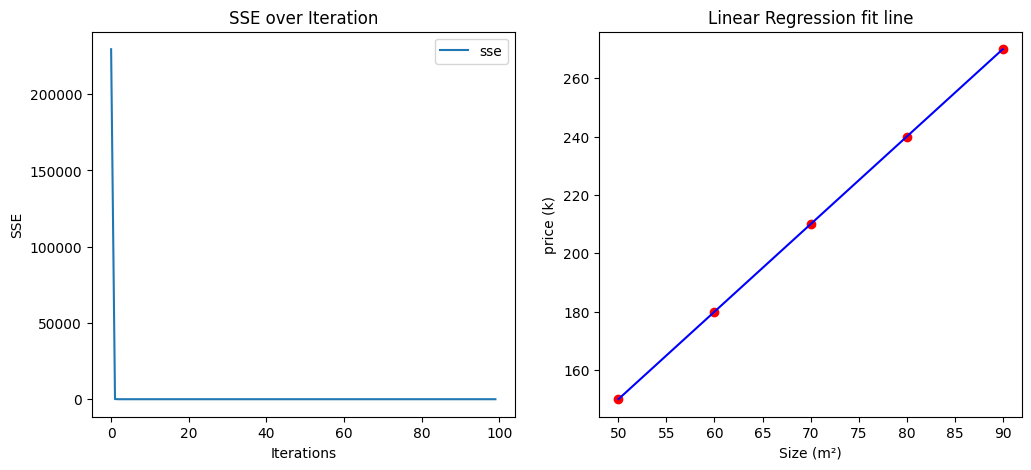

In [130]:
model.plot_training(x, y)

## Trying Learning rate 

In [131]:
model_large_lr = LinearRegressionGD(learning_rate=0.1, n_iters=100)
model_large_lr.fit(x, y)
print("Final SSE (large lr) =", model_large_lr.sse_values[-1])

model_small_lr = LinearRegressionGD(learning_rate=0.00001, n_iters=100)
model_small_lr.fit(x, y)
print("Final SSE (small lr) =", model_small_lr.sse_values[-1])


Optimixed param : slop = -2.007459532378114e+301, bias =-2.7553577959884946e+299
Final SSE (large lr) = inf
Optimixed param : slop = 2.9993713328364127, bias =0.04116492950170943
Final SSE (small lr) = 0.00046041150816733306


C:\Users\Mostafa\AppData\Local\Temp\ipykernel_4816\3736841201.py:47: RuntimeWarning: overflow encountered in square
  sse = np.sum((y_hat - y)**2)


## Bonus

In [132]:
model = LinearRegressionGD(learning_rate=0.001, n_iters=100)
model.fit(x, y)
print("MSE =", model.mean_squared_error(x, y))


Optimixed param : slop = -7.326427288635144e+96, bias =-1.0055957901462392e+95
MSE = 2.7385349181421895e+197


In [133]:
model = LinearRegressionGD(learning_rate=0.0001, n_iters=100)
model.fit(x, y)
print("MSE =", model.mean_squared_error(x, y))


Optimixed param : slop = 2.999435373457505, bias =0.04113676040970018
MSE = 6.636208076299688e-05


In [134]:
X_norm = (x - x.min()) / (x.max() - x.min())

model_norm = LinearRegressionGD(learning_rate=0.001, n_iters=100)
model_norm.fit(X_norm, y)

print("Theta 0 (normalized) =", model_norm.theta_0)
print("Theta 1 (normalized) =", model_norm.theta_1)
print("MSE (normalized) =", model_norm.mean_squared_error(X_norm, y))


Optimixed param : slop = 21.262800853039618, bias =37.07395010078988
Theta 0 (normalized) = 21.262800853039618
Theta 1 (normalized) = 37.07395010078988
MSE (normalized) = 27558.182559386732


In [135]:
class LinearRegressionGDMulti:
    """ 
    Linear Regression using Gradient Descent optimization algorithm.
    Parameters:
    learning_rate: The step size for updating the parameters.
    n_iters: The number of iterations to perform for gradient descent.
    Attributes:
    thetas: A numpy array containing the parameters (theta_0, theta_1, ..., theta_n) of the regression model.
    sse_values: A list to store the sum of squared errors (SSE) for each iteration.
    Methods:
    fit(x, y): Trains the model using the provided training data (x and y).
    predict(x): Predicts the target values for the given input data x using the learned parameters.
    mean_squared_error(x, y): Calculates and returns the mean squared error of the model on the given data.
    """
    def __init__(self ,learning_rate = .001 ,n_iters = 100):
        
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.thetas = None
        self.sse_values = []


    def fit(self,x,y):
        """ 
        Trains the linear regression model using gradient descent optimization.
        Parameters:
        x: A numpy array of shape (n_samples, n_features) representing the input features (e.g., size of the house, number of rooms).
        y: A numpy array of shape (n_samples,) representing the target values (e.g., price of the house).
        The method iteratively updates the parameters (theta_0, theta_1, ..., theta_n) to minimize the sum of squared errors (SSE) between the predicted values and the actual target values.
        """
        x = np.array(x)
        n_samples, n_features = x.shape
        self.thetas = np.zeros(n_features + 1)
        

        for i in range(self.n_iters):
            y_hat = np.dot(x, self.thetas[1:]) + self.thetas[0]

            D_0 = 2/n_samples * np.sum((y_hat-y))
            D_1 = 2/n_samples * np.dot(x.T, y_hat-y)

            self.thetas[1:] -= self.learning_rate * D_1
            self.thetas[0] -= self.learning_rate * D_0
            
            sse = np.sum((y_hat - y)**2)
            self.sse_values.append(sse)
        
        print(f"Optimixed param : slop = {self.thetas[1]}, bias ={self.thetas[0]}")

    def predict(self, x):
        """ 
        Predicts the target values for the given input data x using the learned parameters.
        Parameters:
        x: A numpy array of shape (n_samples, n_features) representing the input features for which predictions are to be made.
        Returns:
        A numpy array of shape (n_samples,) containing the predicted target values based on the learned multi-linear regression model.
        """
        x = np.array(x)
        return np.dot(x, self.thetas[1:]) + self.thetas[0] 

    def mean_squared_error(self, x, y):
        """ 
        Calculates and returns the mean squared error (MSE) of the model on the given data.
        Parameters:
        x: A numpy array of shape (n_samples, n_features) representing the input features (e.g., size of the house, number of rooms).
        y: A numpy array of shape (n_samples,) representing the actual target values (e.g., price of the house).
        Returns:
        A float representing the mean squared error of the model's predictions compared to the actual target values.
        The method computes the predicted values using the current model parameters and then calculates the MSE by averaging the squared differences between the predicted values and the actual target values.
        """
        y_pred = self.predict(x)
        mse = np.mean((y - y_pred)**2)
        return mse
        

In [136]:
X_multi = np.array([[50, 2], [60, 3], [70, 2], [80, 4], [90, 5]])  
y = np.array([150, 180, 210, 240, 270])

model_multi = LinearRegressionGDMulti(learning_rate=0.001, n_iters=100)
model_multi.fit(X_multi, y)
print("Predicted price =", model_multi.predict([[75, 3]]))
print("MSE =", model_multi.mean_squared_error(X_multi, y))


Optimixed param : slop = -9.303977074038199e+96, bias =-1.2769696294827143e+95
Predicted price = [-6.99228655e+98]
MSE = 4.4356828980064266e+197


In [137]:
X_multi = np.array([[50, 2], [60, 3], [70, 2], [80, 4], [90, 5]])  
y = np.array([150, 180, 210, 240, 270])

model_multi = LinearRegressionGDMulti(learning_rate=0.0001, n_iters=100)
model_multi.fit(X_multi, y)
print("Predicted price =", model_multi.predict([[75, 3]]))
print("MSE =", model_multi.mean_squared_error(X_multi, y))


Optimixed param : slop = 2.992976311519492, bias =0.041231657237521244
Predicted price = [224.92955984]
MSE = 0.008751234235356137
